In [1]:
from AQUA_class import *
from AQUA_GPT import *
from plotting_functions import *

import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Large enough f will shift the behaviour of the system to bursting

# IB neuron parameters
a = 0.1
b = 0.2
c = -65
d = 2

#autaptic parameters
e = 0.05     # Bacci et al. 2003
f = -7    # negative for inhibitory interneuron
tau = 3    # ms (Bacci et al. 2003)

#simulation parameters
T = 2       # s
dt = 0.01   # ms
N_iter = int(T*1000/dt)

#Initialization variables, X_start must contain 3-elements
x_start = np.array([-70, -14, 0]) # [v(0), u(0), w(0)]
t_start = np.array([0])


I_height = 10
I_inj = I_height*np.ones(N_iter)

C:\Users\liamm\AppData\Local\Temp\ipykernel_34560\70055767.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


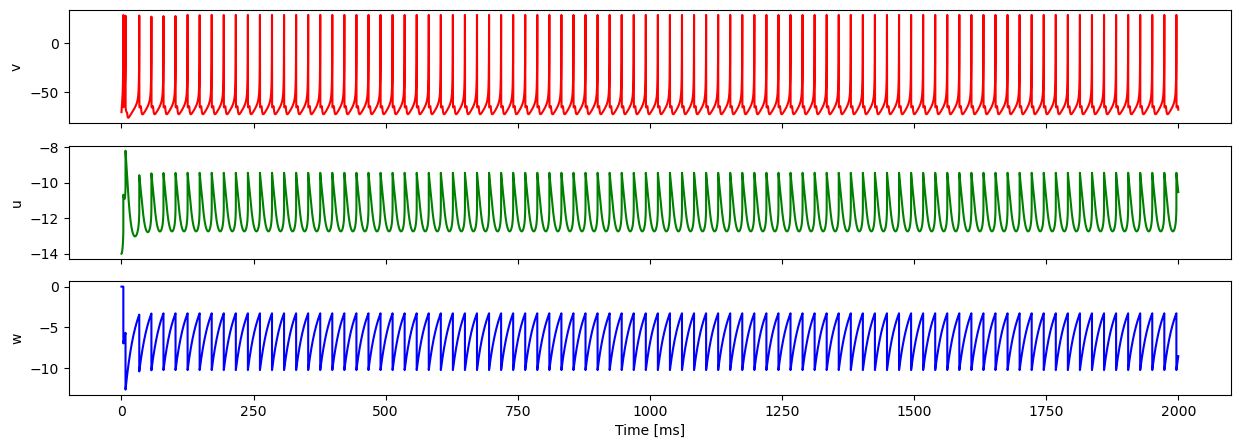

In [3]:
neuron1 = AQUA(a, b, c, d, e, f, tau)
neuron1.Initialise(x_start, t_start)
X1, T1, spikes1 = neuron1.update_RK2(dt, N_iter, I_inj)

fig2, ax2 = plot_membrane_variables(X1, T1)
fig2.show()


10.0


C:\Users\liamm\AppData\Local\Temp\ipykernel_34560\2784963257.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


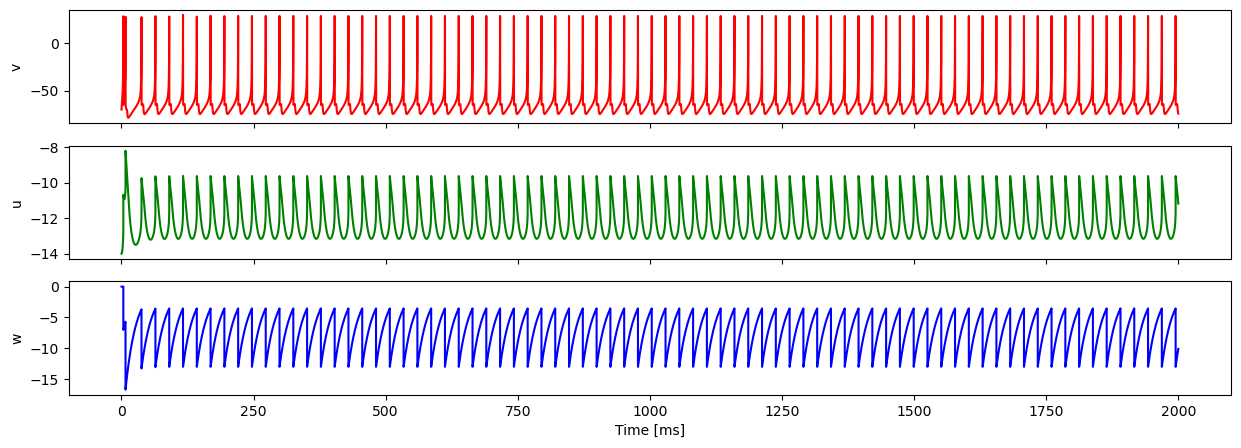

In [4]:
# The GPT optimised version of AQUA runs slightly more quickly ~0.1 seconds for N_iter = 200,000
neuron2 = AQUA_GPT(a, b, c, d, e, f, tau)
print(neuron2.E_syn)
neuron2.initialise(x_start, t_start)
X2, T2, spikes2 = neuron2.update_RK2(dt, N_iter, I_inj)

fig2, ax2 = plot_membrane_variables(X2, T2)
fig2.show()